In [11]:
# Before running these commands, create a virtual environment (outside project directory) using python -m venv "dir_name/env_name"
%pip install deepxde
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
%pip install chart-studio
%pip install nbformat

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import deepxde as dde
import numpy as np

Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.



Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
geo = dde.geometry.Interval(-1, 1)
T = 310.0
def dU(x):
    return 4*(x[0]**2 - 1)*(x[0])

def committor(x, q):
    dq_x = dde.gradients.jacobian(q, x, i = 0)
    dlap_q = dde.gradients.hessian(q, x, i = 0, j = 0)
    grad_U = dU(x)
    beta = 1 / T
    return -1/beta * dlap_q + grad_U * dq_x


bc_a = dde.icbc.DirichletBC(geo, lambda x: 0, lambda x, on_boundary: on_boundary and np.isclose(x[0], -1))
bc_b = dde.icbc.DirichletBC(geo, lambda x: 1, lambda x, on_boundary: on_boundary and np.isclose(x[0], 1))


In [4]:
data = dde.data.pde.TimePDE(
    geo,
    committor, 
    [bc_a, bc_b], 
    num_domain=2560,
    num_boundary=80,
    num_test=2560
)

In [5]:
net = dde.maps.FNN([1] + [64] * 3 + [1], "tanh", "Glorot normal")
model = dde.Model(data, net)
model.compile("adam", lr=0.001)
losshistory, train_state = model.train(iterations=5000)

Compiling model...
Building feed-forward neural network...
'build' took 0.102151 s


'compile' took 0.664971 s

Training model...

Step      Train loss                        Test loss                         Test metric
0         [3.73e+01, 3.89e-02, 6.44e-01]    [3.58e+01, 3.89e-02, 6.44e-01]    []  
1000      [8.06e-04, 1.96e-06, 9.91e-06]    [8.32e-04, 1.96e-06, 9.91e-06]    []  
2000      [1.05e-04, 3.33e-07, 4.74e-07]    [8.91e-05, 3.33e-07, 4.74e-07]    []  
3000      [6.13e-05, 1.80e-08, 2.32e-08]    [5.27e-05, 1.80e-08, 2.32e-08]    []  
4000      [2.84e-04, 5.06e-05, 5.59e-05]    [2.40e-04, 5.06e-05, 5.59e-05]    []  
5000      [2.76e-05, 1.56e-07, 1.69e-07]    [2.28e-05, 1.56e-07, 1.69e-07]    []  

Best model at step 5000:
  train loss: 2.79e-05
  test loss: 2.32e-05
  test metric: []

'train' took 79.081105 s



In [6]:
model.compile("L-BFGS-B")
losshistory, train_state=model.train()

Compiling model...
'compile' took 0.193050 s

Training model...

Step      Train loss                        Test loss                         Test metric
5000      [2.76e-05, 1.56e-07, 1.69e-07]    [2.28e-05, 1.56e-07, 1.69e-07]    []  

INFO:tensorflow:Optimization terminated with:
  Message: CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH
  Objective function value: 0.000028
  Number of iterations: 1
  Number of functions evaluations: 33
5019      [2.76e-05, 1.56e-07, 1.69e-07]    [2.28e-05, 1.56e-07, 1.69e-07]    []  

Best model at step 5000:
  train loss: 2.79e-05
  test loss: 2.32e-05
  test metric: []

'train' took 0.859368 s



Total probability: 0.9999838551534481


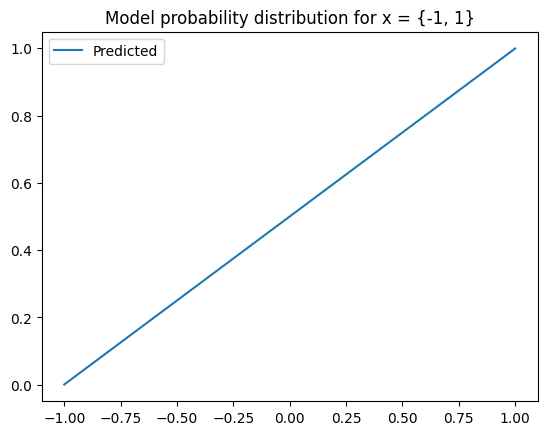

In [26]:
import matplotlib.pyplot as plt

x = np.linspace(-1, 1, 200).reshape(-1,1)
u_pred = model.predict(x)
print(f"Total probability: {np.trapezoid(u_pred.reshape(-1,), x.reshape(-1,))}")
plt.plot(x, u_pred, label="Predicted")
plt.legend()
plt.title("Model probability distribution for x = {-1, 1}")
plt.show()